# DATA BOOTCAMP FINAL PROJECT
## Joanna Patsalis and Victoria Mcclemens
### Coffee Production

In this project, we analyzed the coffee industry in an effort to understand the impact that the deregulation of the International Coffee Agreement (ICA) in 1989 had on the production and  prices of coffee. We learned that production was dominated by one major player (Brazil) and that prices and production have risen over the past 20 years with periods of intense volatility. We also learned that the demand curves for the consumption of coffee are relatively inelastic, so - while consumption has increased over the past 20 years - price has not risen as much as production. 

#### Import Data: https://www.kaggle.com/sbajew/exploring-coffee-production-and-consumption

In [13]:
# for data wrangling and normalisation
import pandas as pd
from sklearn import preprocessing

# for statistical tests
from scipy import stats

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Variables...

In [14]:
# COUNTRY- Member state of ICO; there are 56 countries in this dataset
# YEAR- Crop year for which the data was collected
# MONTH- Month of crop harvest
# TOTAL_PRODUCTION - total coffee production in a member state per year
# DOMESTIC_CONSUMPTION - coffee consumption in a member state per year
# EXPORTABLE_PRODUCTION - amount of coffee dedicated for exports per year, essentially the difference between Total Production and Domestic Consumption
# GROSS_OPENING_STOCKS - amount of coffee held at the end of each crop year for the next accounting year

Full data set: values represent thousand 60 kg bags of green coffee

In [15]:
coff = pd.read_csv('/Users/UserName/desktop/ICO_CROP_DATA.csv')
coff

,COUNTRY,YEAR,MONTH,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
0,Angola,1990/91,April,50.3450,20.000,30.3450,210.000
1,Bolivia,1990/91,April,122.7770,25.000,97.7770,54.000
2,Brazil,1990/91,April,27285.6286,8200.000,19085.6286,26926.000
3,Burundi,1990/91,April,487.3930,2.000,485.3930,77.000
4,Ecuador,1990/91,April,1503.8150,350.000,1153.8150,723.963
5,Indonesia,1990/91,April,7441.3830,1242.000,6199.3830,1319.000
6,Madagascar,1990/91,April,982.4470,350.000,632.4470,544.000
7,Malawi,1990/91,April,104.6280,2.000,102.6280,20.000
8,Papua New Guinea,1990/91,April,962.8410,3.000,959.8410,199.000
9,Paraguay,1990/91,April,130.6270,15.000,115.6270,188.000


In [16]:
coff.describe()

,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
count,1521.000000,1521.000000,1559.000000,1560.000000
mean,2244.821485,615.311021,1620.558960,669.945847
std,6230.405278,2159.586060,4302.678374,3505.872743
min,0.000000,0.000000,0.000000,0.000000
25%,44.313000,5.000000,10.628250,0.000000
50%,370.612300,67.000000,135.000000,17.645500
75%,1572.432600,330.000000,1247.014250,153.321000
max,56763.763400,21997.000000,35538.763400,43762.000000


### changing years to integers, removing unnecessary columns, and removing missing (NaN) data

In [17]:
#### turn years into integers
coff['YEAR_short'] = coff['YEAR'].map(lambda x: str(x)[:4])
coff['YEAR_short'] = coff['YEAR_short'].astype(int)
coff

,COUNTRY,YEAR,MONTH,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS,YEAR_short
0,Angola,1990/91,April,50.3450,20.000,30.3450,210.000,1990
1,Bolivia,1990/91,April,122.7770,25.000,97.7770,54.000,1990
2,Brazil,1990/91,April,27285.6286,8200.000,19085.6286,26926.000,1990
3,Burundi,1990/91,April,487.3930,2.000,485.3930,77.000,1990
4,Ecuador,1990/91,April,1503.8150,350.000,1153.8150,723.963,1990
5,Indonesia,1990/91,April,7441.3830,1242.000,6199.3830,1319.000,1990
6,Madagascar,1990/91,April,982.4470,350.000,632.4470,544.000,1990
7,Malawi,1990/91,April,104.6280,2.000,102.6280,20.000,1990
8,Papua New Guinea,1990/91,April,962.8410,3.000,959.8410,199.000,1990
9,Paraguay,1990/91,April,130.6270,15.000,115.6270,188.000,1990


In [18]:
#coff[coff.isnull().any(axis=1)]
#coff[coff.isnull().any(axis=1)]['COUNTRY'].unique()

# drop nans for now and not useful columns. come back if there is time for interpolation
coff.drop(['MONTH', 'GROSS_OPENING_STOCKS', 'YEAR'], axis=1, inplace=True)# drop not useful cols
coff # drop NANS ~ does the opposite of what you put in the filter
coff.head()

,COUNTRY,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,YEAR_short
0,Angola,50.3450,20.0,30.3450,1990
1,Bolivia,122.7770,25.0,97.7770,1990
2,Brazil,27285.6286,8200.0,19085.6286,1990
3,Burundi,487.3930,2.0,485.3930,1990
4,Ecuador,1503.8150,350.0,1153.8150,1990


## Import dataset with Prices to growers of Robustas Coffee. Here there are fewer countries that produce the specific type of coffee and we have decised to concentrait on those. 

### Once we import the dataset we want to merge with Production-Consumption data and do some analysis on production and pricing.

In [19]:
price = pd.read_csv('/Users/UserName/desktop/Prices to growers- Robustas coffee.csv')
price           


,COUNTRY,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Angola,85.66,91.12,44.92,11.87,NaN,NaN,NaN,NaN,NaN,...,42.32,40.14,44.39,48.29,47.51,31.37,46.15,38.18,78.33,132.14
1,Benin,53.76,22.90,24.01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,34.85,27.49,27.59,35.54,85.43,97.50,69.78,77.86,77.75,...,91.58,73.42,74.22,105.29,104.40,85.29,81.16,73.53,92.78,98.21
3,Burundi,NaN,NaN,47.16,41.80,41.45,42.34,40.45,40.19,35.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cameroon,28.33,25.01,24.25,17.40,29.85,52.08,51.02,38.90,36.46,...,52.54,37.74,NaN,NaN,NaN,66.43,NaN,NaN,NaN,NaN
5,Central African Republic,36.75,36.64,33.93,23.89,32.74,57.19,45.07,38.36,37.86,...,45.69,43.59,51.40,72.72,68.73,NaN,NaN,40.03,30.74,NaN
6,"Congo, Dem. Rep. of",4.52,NaN,NaN,NaN,NaN,28.35,32.89,45.36,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Congo, Rep. of",19.21,18.55,19.75,18.44,8.77,27.28,14.19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Cote d'Ivoire,33.41,32.27,31.76,27.70,29.78,59.40,57.70,39.29,40.14,...,51.86,37.52,22.49,28.40,46.29,56.94,56.97,49.87,52.76,58.56
9,Ecuador,19.06,17.84,23.31,19.52,63.29,143.62,97.51,61.19,66.63,...,79.26,77.99,80.55,95.26,95.12,76.40,46.47,NaN,NaN,NaN


In [20]:
price2 = pd.melt(price, id_vars=['COUNTRY'])
#have the year and price in different columns

In [21]:
price2['variable']= price2['variable'].astype(int)
price2

,COUNTRY,variable,value
0,Angola,1990,85.66
1,Benin,1990,53.76
2,Brazil,1990,34.85
3,Burundi,1990,NaN
4,Cameroon,1990,28.33
5,Central African Republic,1990,36.75
6,"Congo, Dem. Rep. of",1990,4.52
7,"Congo, Rep. of",1990,19.21
8,Cote d'Ivoire,1990,33.41
9,Ecuador,1990,19.06


In [22]:
priceall = pd.merge(price2, coff, how='left',right_on=['COUNTRY','YEAR_short'], left_on=['COUNTRY','variable'])
priceall= priceall.drop(['YEAR_short'], axis=1)
priceall.rename({'variable':'YEAR', 'value':'GROWER_PRICE'}, axis=1, inplace = True)
priceall
# have the prices for growers next to the production and year for each coountry
# merge 2 columns of the data ("country" and "year")
# rename the columns so it is easier to read the data

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION
0,Angola,1990,85.66,50.3450,20.000,30.3450
1,Benin,1990,53.76,0.0000,0.000,0.0000
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286
3,Burundi,1990,NaN,487.3930,2.000,485.3930
4,Cameroon,1990,28.33,1682.4840,83.300,1599.1840
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740
6,"Congo, Dem. Rep. of",1990,4.52,1580.2960,200.000,1380.2960
7,"Congo, Rep. of",1990,19.21,2.9240,3.000,0.0000
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150


In [23]:
# removed all NaNs
priceall = priceall[~(priceall.isnull().any(axis=1))]

In [24]:
priceall

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION
0,Angola,1990,85.66,50.3450,20.000,30.3450
1,Benin,1990,53.76,0.0000,0.000,0.0000
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286
4,Cameroon,1990,28.33,1682.4840,83.300,1599.1840
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740
6,"Congo, Dem. Rep. of",1990,4.52,1580.2960,200.000,1380.2960
7,"Congo, Rep. of",1990,19.21,2.9240,3.000,0.0000
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150
10,Gabon,1990,43.43,3.4080,1.700,1.7080


In [25]:
priceall['COUNTRY'].unique()

array(['Angola', 'Benin', 'Brazil', 'Cameroon',
       'Central African Republic', 'Congo, Dem. Rep. of',
       'Congo, Rep. of', "Cote d'Ivoire", 'Ecuador', 'Gabon', 'Guinea',
       'India', 'Indonesia', 'Madagascar', 'Nigeria', 'Papua New Guinea',
       'Philippines', 'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand',
       'Togo', 'Trinidad & Tobago', 'Uganda', 'Vietnam', 'Burundi',
       'Ghana'], dtype=object)

In [26]:
## now adding a variable to find out what % of their coffee is consumed within the country?
priceall['INT_CONS'] = priceall['DOMESTIC_CONSUMPTION']/priceall['TOTAL_PRODUCTION']
priceall['REVENUE'] = (priceall['GROWER_PRICE']) * (priceall['TOTAL_PRODUCTION'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
priceall

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,INT_CONS,REVENUE
0,Angola,1990,85.66,50.3450,20.000,30.3450,0.397259,4.312553e+03
1,Benin,1990,53.76,0.0000,0.000,0.0000,NaN,0.000000e+00
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286,0.300525,9.509042e+05
4,Cameroon,1990,28.33,1682.4840,83.300,1599.1840,0.049510,4.766477e+04
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740,0.159750,6.441319e+03
6,"Congo, Dem. Rep. of",1990,4.52,1580.2960,200.000,1380.2960,0.126559,7.142938e+03
7,"Congo, Rep. of",1990,19.21,2.9240,3.000,0.0000,1.025992,5.617004e+01
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630,0.017005,9.823753e+04
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150,0.232741,2.866271e+04
10,Gabon,1990,43.43,3.4080,1.700,1.7080,0.498826,1.480094e+02


In [28]:
priceall['REVENUE'].astype('float')
priceall

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,INT_CONS,REVENUE
0,Angola,1990,85.66,50.3450,20.000,30.3450,0.397259,4.312553e+03
1,Benin,1990,53.76,0.0000,0.000,0.0000,NaN,0.000000e+00
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286,0.300525,9.509042e+05
4,Cameroon,1990,28.33,1682.4840,83.300,1599.1840,0.049510,4.766477e+04
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740,0.159750,6.441319e+03
6,"Congo, Dem. Rep. of",1990,4.52,1580.2960,200.000,1380.2960,0.126559,7.142938e+03
7,"Congo, Rep. of",1990,19.21,2.9240,3.000,0.0000,1.025992,5.617004e+01
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630,0.017005,9.823753e+04
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150,0.232741,2.866271e+04
10,Gabon,1990,43.43,3.4080,1.700,1.7080,0.498826,1.480094e+02


## Keep Countries with >20 years of data

In [29]:
dataYears = priceall['COUNTRY'].value_counts()
dataYears

India                       28
Togo                        28
Uganda                      28
Brazil                      28
Cote d'Ivoire               27
Papua New Guinea            27
Thailand                    26
Ecuador                     25
Philippines                 24
Vietnam                     24
Central African Republic    23
Angola                      22
Gabon                       20
Tanzania                    19
Cameroon                    18
Indonesia                   18
Madagascar                  18
Trinidad & Tobago           10
Congo, Dem. Rep. of         10
Ghana                        7
Burundi                      7
Congo, Rep. of               7
Sri Lanka                    6
Guinea                       6
Nigeria                      5
Benin                        3
Sierra Leone                 3
Name: COUNTRY, dtype: int64

In [30]:
keep_c = set(dataYears[dataYears>=20].index)   #first we create a set the index of the countries with >=20

In [31]:
keep_c

{'Angola',
 'Brazil',
 'Central African Republic',
 "Cote d'Ivoire",
 'Ecuador',
 'Gabon',
 'India',
 'Papua New Guinea',
 'Philippines',
 'Thailand',
 'Togo',
 'Uganda',
 'Vietnam'}

In [32]:
def find(x, keep_c):
    return x if x in keep_c else None

In [33]:
priceall['temp'] = priceall['COUNTRY'].apply(lambda x: x if x in keep_c else None)
# priceall['temp'] = priceall['COUNTRY'].apply(lambda x: find(x, keep_c))
priceall.head()

# go thru the Country column and if the country is in the set we set it up as none otherwise keep the name as is. Create a temp column

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,INT_CONS,REVENUE,temp
0,Angola,1990,85.66,50.3450,20.0,30.3450,0.397259,4312.55270,Angola
1,Benin,1990,53.76,0.0000,0.0,0.0000,NaN,0.00000,None
2,Brazil,1990,34.85,27285.6286,8200.0,19085.6286,0.300525,950904.15671,Brazil
4,Cameroon,1990,28.33,1682.4840,83.3,1599.1840,0.049510,47664.77172,None
5,Central African Republic,1990,36.75,175.2740,28.0,147.2740,0.159750,6441.31950,Central African Republic


In [34]:
priceall_20 = priceall.dropna(subset=['temp'])
# we drop the coutries that have non i the temp column

In [35]:
priceall_20

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,INT_CONS,REVENUE,temp
0,Angola,1990,85.66,50.3450,20.000,30.3450,0.397259,4.312553e+03,Angola
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286,0.300525,9.509042e+05,Brazil
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740,0.159750,6.441319e+03,Central African Republic
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630,0.017005,9.823753e+04,Cote d'Ivoire
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150,0.232741,2.866271e+04,Ecuador
10,Gabon,1990,43.43,3.4080,1.700,1.7080,0.498826,1.480094e+02,Gabon
13,India,1990,44.35,2828.6870,903.000,1925.6870,0.319229,1.254523e+05,India
18,Papua New Guinea,1990,26.60,962.8410,3.000,959.8410,0.003116,2.561157e+04,Papua New Guinea
19,Philippines,1990,34.23,973.6320,720.000,253.6320,0.739499,3.332742e+04,Philippines
23,Thailand,1990,37.72,757.0170,188.000,569.0170,0.248343,2.855468e+04,Thailand


In [36]:
#priceall['COUNTRY'].apply(lambda x: x if x in keep_c else None)

## Analyse Pricing

In [37]:
priceall_20['GROWER_PRICE'].describe()
# range of price is from $6.44 to $143.62 with $27.07 as standard deviation and $49.75 as a mean

count    330.000000
mean      49.752606
std       27.076252
min        6.440000
25%       27.952500
50%       44.715000
75%       68.865000
max      143.620000
Name: GROWER_PRICE, dtype: float64

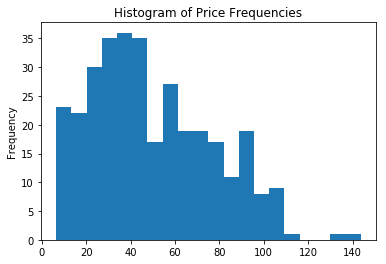

In [38]:
priceall_20['GROWER_PRICE'].plot.hist(bins=20, title='Histogram of Price Frequencies')

#priceall_20['GROWER_PRICE'].plot(kind='hist', bins=[50,50,150]) # `bins` defines the start and end points of bins

## Plotting

In [39]:
priceall_20

,COUNTRY,YEAR,GROWER_PRICE,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,INT_CONS,REVENUE,temp
0,Angola,1990,85.66,50.3450,20.000,30.3450,0.397259,4.312553e+03,Angola
2,Brazil,1990,34.85,27285.6286,8200.000,19085.6286,0.300525,9.509042e+05,Brazil
5,Central African Republic,1990,36.75,175.2740,28.000,147.2740,0.159750,6.441319e+03,Central African Republic
8,Cote d'Ivoire,1990,33.41,2940.3630,50.000,2890.3630,0.017005,9.823753e+04,Cote d'Ivoire
9,Ecuador,1990,19.06,1503.8150,350.000,1153.8150,0.232741,2.866271e+04,Ecuador
10,Gabon,1990,43.43,3.4080,1.700,1.7080,0.498826,1.480094e+02,Gabon
13,India,1990,44.35,2828.6870,903.000,1925.6870,0.319229,1.254523e+05,India
18,Papua New Guinea,1990,26.60,962.8410,3.000,959.8410,0.003116,2.561157e+04,Papua New Guinea
19,Philippines,1990,34.23,973.6320,720.000,253.6320,0.739499,3.332742e+04,Philippines
23,Thailand,1990,37.72,757.0170,188.000,569.0170,0.248343,2.855468e+04,Thailand


### % of Domestic Consumption as part of Production for first and last year of data (1990 and 2017)

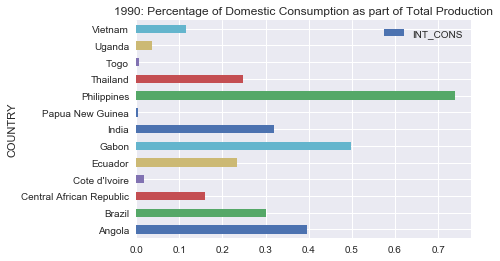

In [40]:
import seaborn as sns
sns.set()
#C = priceall_20[(priceall_20['YEAR']=='1990')['INT_CONS']]
perc_1990 = priceall_20.loc[priceall['YEAR'].isin(['1990'])]
perc_1990 = perc_1990.set_index('COUNTRY')
perc_1990.plot.barh(y='INT_CONS', title='1990: Percentage of Domestic Consumption as part of Total Production')

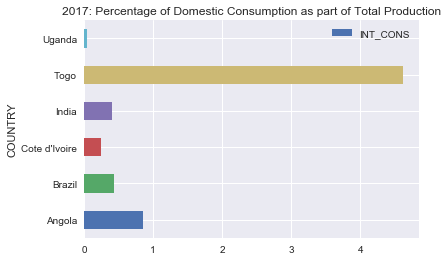

In [41]:
import seaborn as sns
sns.set()

perc_2017 = priceall_20.loc[priceall['YEAR'].isin(['2017'])]
perc_2017 = perc_2017.set_index('COUNTRY')
perc_2017.plot.barh(y='INT_CONS', title='2017: Percentage of Domestic Consumption as part of Total Production')


## Production per country for first and last year of data (1990 and 2017)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


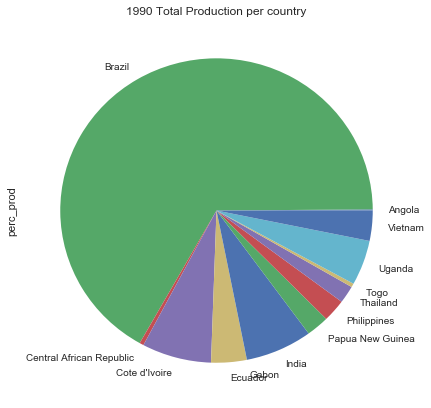

In [42]:
import seaborn as sns
sns.set()

total_prod = priceall_20.loc[priceall['YEAR'].isin(['1990'])]
total_prod['perc_prod'] = (total_prod['TOTAL_PRODUCTION'])/(total_prod['TOTAL_PRODUCTION'].sum())
total_prod = total_prod.set_index('COUNTRY')

total_prod.perc_prod.plot.pie(title = '1990 Total Production per country', figsize=(7, 7))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


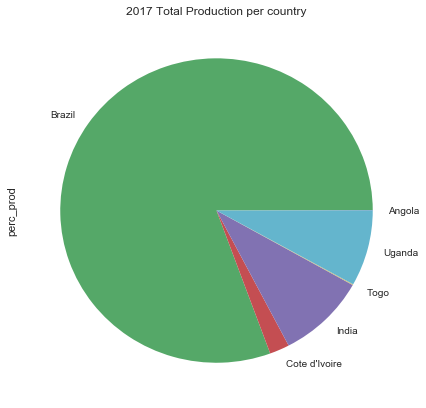

In [43]:
total_prod = priceall_20.loc[priceall['YEAR'].isin(['2017'])]
total_prod['perc_prod'] = (total_prod['TOTAL_PRODUCTION'])/(total_prod['TOTAL_PRODUCTION'].sum())
total_prod = total_prod.set_index('COUNTRY')

total_prod.perc_prod.plot.pie(title = '2017 Total Production per country', figsize=(7, 7))

## Scatter plot for Price over the years

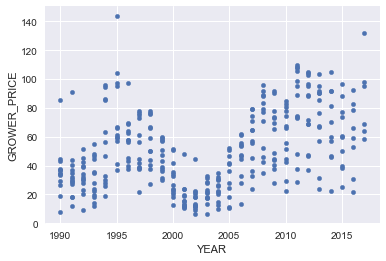

In [44]:
# overall price vs production
priceall_20.plot.scatter(x='YEAR', y='GROWER_PRICE')

## Scatter plot Production vs Price and Consumption vs Price - determine if there is a correlation between over the years

In [178]:
import numpy as np
np.corrcoef(priceall_20['TOTAL_PRODUCTION'], priceall_20['GROWER_PRICE'])

0.23498974

array([[1.        , 0.23498974],
       [0.23498974, 1.        ]])

(-10, 2000)

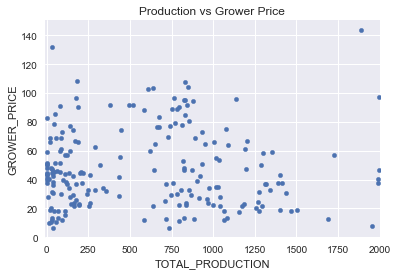

In [45]:
priceall_20.plot.scatter(x='TOTAL_PRODUCTION', y='GROWER_PRICE', title = 'Production vs Grower Price').set_xlim(-10, 2000)

## looks like no corr between price and production for the smaller growers

(0, 1500)

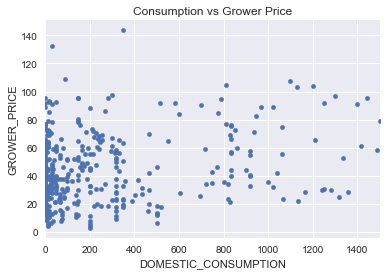

In [46]:
priceall.plot.scatter(x='DOMESTIC_CONSUMPTION', y='GROWER_PRICE', title = 'Consumption vs Grower Price').set_xlim(0, 1500)

## Define countries as new Variables

In [47]:
keep_c

{'Angola',
 'Brazil',
 'Central African Republic',
 "Cote d'Ivoire",
 'Ecuador',
 'Gabon',
 'India',
 'Papua New Guinea',
 'Philippines',
 'Thailand',
 'Togo',
 'Uganda',
 'Vietnam'}

In [48]:
Brazil = priceall.loc[priceall['COUNTRY'].str.contains('Brazil'),:]
Angola = priceall.loc[priceall['COUNTRY'].str.contains('Angola'),:]
C_Afr_Rep = priceall.loc[priceall['COUNTRY'].str.contains('Central African Republic'),:] ## changed this name!
Ecuador = priceall.loc[priceall['COUNTRY'].str.contains('Ecuador'),:]
Cote = priceall.loc[priceall['COUNTRY'].str.contains("Cote d'Ivoire"),:]
Gabon = priceall.loc[priceall['COUNTRY'].str.contains('Gabon'),:]
India = priceall.loc[priceall['COUNTRY'].str.contains('India'),:]
Papua = priceall.loc[priceall['COUNTRY'].str.contains('Papua New Guinea'),:]
Philippines = priceall.loc[priceall['COUNTRY'].str.contains('Philippines'),:]
Thailand = priceall.loc[priceall['COUNTRY'].str.contains('Thailand'),:]
Togo = priceall.loc[priceall['COUNTRY'].str.contains('Togo'),:]
Uganda = priceall.loc[priceall['COUNTRY'].str.contains('Uganda'),:]
Vietnam = priceall.loc[priceall['COUNTRY'].str.contains('Vietnam'),:]

## Define  continents as new variables

In [49]:
Africa_top = ['Uganda', 'Togo', 'C_Afr_Rep','Angola', 'Gabon', 'Cote']
Africa = priceall.loc[priceall['COUNTRY'].isin(Africa_top),:]

Asia_top = ['India', 'Philippines', 'Vietnam', 'Thailand']
Asia = priceall.loc[priceall['COUNTRY'].isin(Asia_top),:]

SA_top = ['Brazil', 'Papua', 'Ecuador']
SA = priceall.loc[priceall['COUNTRY'].isin(SA_top),:]

## Plot grower's Price VS Total Production for each country

[]

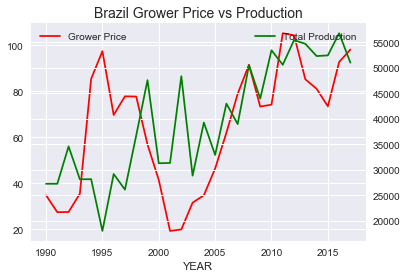

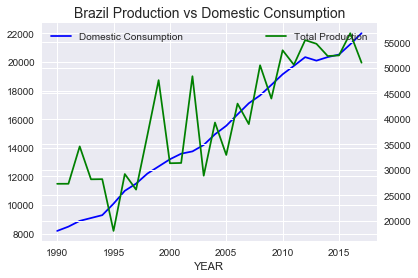

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


#plot BRAZIL (price + Production)
Brazil = priceall.loc[priceall['COUNTRY'].str.contains('Brazil'),:]
plotCorr = ['YEAR', 'GROWER_PRICE', 'TOTAL_PRODUCTION']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1 = Brazil[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='red', label='Grower Price',ax=ax1)
ax2 = Brazil[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='Green', label='Total Production', ax=ax2)

ax1.legend(["Grower Price"] ,loc='upper left',frameon=False)
ax2.legend(["Total Production"] ,loc='upper right',frameon=False)
ax1.set_title('Brazil Grower Price vs Production', fontsize=14, loc='center')
ax2.plot()

#plot BRAZIL (Consumption + Production)
Brazil = priceall.loc[priceall['COUNTRY'].str.contains('Brazil'),:]
plotCorr = ['YEAR', 'DOMESTIC_CONSUMPTION', 'TOTAL_PRODUCTION']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1 = Brazil[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='blue', label='Domestic Consumption', legend = 'Domestic Consumption',ax=ax1)
ax2 = Brazil[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='Green', label='Total Production', legend = 'Domestic Consumption', ax=ax2)

ax1.set_title('Brazil Production vs Domestic Consumption', fontsize=14, loc='center')
ax1.legend(loc='upper left',frameon=False)
ax2.legend(loc='upper right',frameon=False)
ax2.plot()

## REVENUE PER COUNTRY

[]

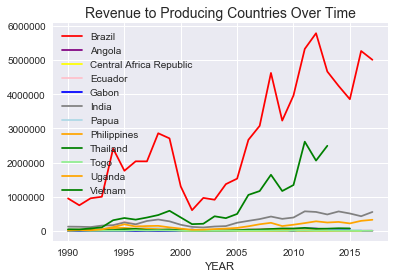

In [51]:
fig, ax1 = plt.subplots()

# with brazil and vietnam

plotCorr = ['YEAR', 'REVENUE']
ax1 = Brazil[plotCorr].plot(x='YEAR', y='REVENUE', color='red', label='Brazil', legend='Brazil',ax=ax1)
ax1 = Angola[plotCorr].plot(x='YEAR', y='REVENUE', color='purple', label='Angola', legend='Angola', ax=ax1)
ax1 = C_Afr_Rep[plotCorr].plot(x='YEAR', y='REVENUE', color='yellow', label='Central Africa Republic', legend='Central Africa Republic', ax=ax1)
ax1 = Ecuador[plotCorr].plot(x='YEAR', y='REVENUE', color='pink', label='Ecuador', legend='Ecuador', ax=ax1)
ax1 = Gabon[plotCorr].plot(x='YEAR', y='REVENUE', color='blue', label='Gabon', legend='Gabon', ax=ax1)
ax1 = India[plotCorr].plot(x='YEAR', y='REVENUE', color='gray', label='India', legend='India', ax=ax1)
ax1 = Papua[plotCorr].plot(x='YEAR', y='REVENUE', color='lightblue', label='Papua', legend='Papua', ax=ax1)
ax1 = Philippines[plotCorr].plot(x='YEAR', y='REVENUE', color='orange', label='Philippines', legend='Philippines', ax=ax1)
ax1 = Thailand[plotCorr].plot(x='YEAR', y='REVENUE', color='green', label='Thailand', legend='Thailand', ax=ax1)
ax1 = Togo[plotCorr].plot(x='YEAR', y='REVENUE', color='lightgreen', label='Togo', legend='Togo', ax=ax1)
ax1 = Uganda[plotCorr].plot(x='YEAR', y='REVENUE', color='orange', label='Uganda', legend='Uganda', ax=ax1)
ax1 = Vietnam[plotCorr].plot(x='YEAR', y='REVENUE', color='green', label='Vietnam', legend='Vietnam', ax=ax1)

ax1.set_title('Revenue to Producing Countries Over Time', fontsize=14, loc='center')
ax1.plot()

[]

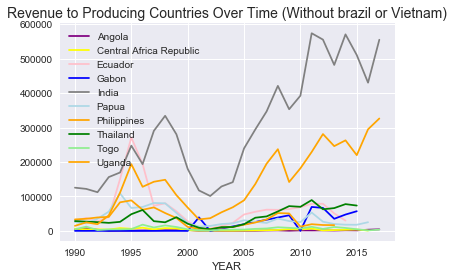

In [52]:
fig, ax1 = plt.subplots()

# without brazil or vietnam

plotCorr = ['YEAR', 'REVENUE']
ax1 = Angola[plotCorr].plot(x='YEAR', y='REVENUE', color='purple', label='Angola', legend='Angola', ax=ax1)
ax1 = C_Afr_Rep[plotCorr].plot(x='YEAR', y='REVENUE', color='yellow', label='Central Africa Republic', legend='Central Africa Republic', ax=ax1)
ax1 = Ecuador[plotCorr].plot(x='YEAR', y='REVENUE', color='pink', label='Ecuador', legend='Ecuador', ax=ax1)
ax1 = Gabon[plotCorr].plot(x='YEAR', y='REVENUE', color='blue', label='Gabon', legend='Gabon', ax=ax1)
ax1 = India[plotCorr].plot(x='YEAR', y='REVENUE', color='gray', label='India', legend='India', ax=ax1)
ax1 = Papua[plotCorr].plot(x='YEAR', y='REVENUE', color='lightblue', label='Papua', legend='Papua', ax=ax1)
ax1 = Philippines[plotCorr].plot(x='YEAR', y='REVENUE', color='orange', label='Philippines', legend='Philippines', ax=ax1)
ax1 = Thailand[plotCorr].plot(x='YEAR', y='REVENUE', color='green', label='Thailand', legend='Thailand', ax=ax1)
ax1 = Togo[plotCorr].plot(x='YEAR', y='REVENUE', color='lightgreen', label='Togo', legend='Togo', ax=ax1)
ax1 = Uganda[plotCorr].plot(x='YEAR', y='REVENUE', color='orange', label='Uganda', legend='Uganda', ax=ax1)

ax1.set_title('Revenue to Producing Countries Over Time (Without brazil or Vietnam)', fontsize=14, loc='center')
ax1.plot()

## PRICE vs Production

[]

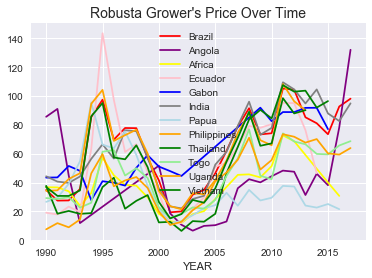

In [53]:
fig, ax1 = plt.subplots()

plotCorr = ['YEAR', 'GROWER_PRICE', 'TOTAL_PRODUCTION']
ax1 = Brazil[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='red', label='Brazil', legend='Brazil',ax=ax1)
ax1 = Angola[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='purple', label='Angola', legend='Angola', ax=ax1)
ax1 = C_Afr_Rep[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='yellow', label='Africa', legend='Africa', ax=ax1)
ax1 = Ecuador[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='pink', label='Ecuador', legend='Ecuador', ax=ax1)
ax1 = Gabon[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='blue', label='Gabon', legend='Gabon', ax=ax1)
ax1 = India[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='gray', label='India', legend='India', ax=ax1)
ax1 = Papua[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='lightblue', label='Papua', legend='Papua', ax=ax1)
ax1 = Philippines[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='orange', label='Philippines', legend='Philippines', ax=ax1)
ax1 = Thailand[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='green', label='Thailand', legend='Thailand', ax=ax1)
ax1 = Togo[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='lightgreen', label='Togo', legend='Togo', ax=ax1)
ax1 = Uganda[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='orange', label='Uganda', legend='Uganda', ax=ax1)
ax1 = Vietnam[plotCorr].plot(x='YEAR', y='GROWER_PRICE', color='green', label='Vietnam', legend='Vietnam', ax=ax1)

ax1.set_title("Robusta Grower's Price Over Time", fontsize=14, loc='center')
ax1.plot()

# I think somewhere in 2002-2003 prices drop worldwide. This can be interesting to research and see what happened back then

## Production vs Years

[]

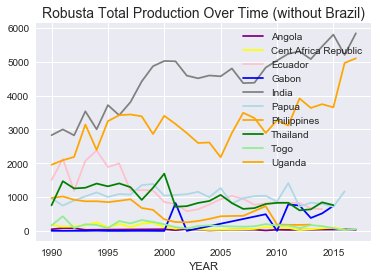

In [54]:
fig, ax1 = plt.subplots()

plotCorr = ['YEAR', 'GROWER_PRICE', 'TOTAL_PRODUCTION']
#ax1 = Brazil[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='red', label='Brazil', legend='Brazil',ax=ax1)
ax1 = Angola[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='purple', label='Angola', legend='Angola', ax=ax1)
ax1 = C_Afr_Rep[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='yellow', label='Cent Africa Republic', legend='Cent Africa Republic', ax=ax1)
ax1 = Ecuador[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='pink', label='Ecuador', legend='Ecuador', ax=ax1)
ax1 = Gabon[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='blue', label='Gabon', legend='Gabon', ax=ax1)
ax1 = India[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='gray', label='India', legend='India', ax=ax1)
ax1 = Papua[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='lightblue', label='Papua', legend='Papua', ax=ax1)
ax1 = Philippines[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='orange', label='Philippines', legend='Philippines', ax=ax1)
ax1 = Thailand[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='green', label='Thailand', legend='Thailand', ax=ax1)
ax1 = Togo[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='lightgreen', label='Togo', legend='Togo', ax=ax1)
ax1 = Uganda[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='orange', label='Uganda', legend='Uganda', ax=ax1)
#ax1 = Vietnam[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='green', label='Vietnam', legend='Vietnam', ax=ax1)

ax1.set_title('Robusta Total Production Over Time (without Brazil)', fontsize=14, loc='center')
ax1.plot()



[]

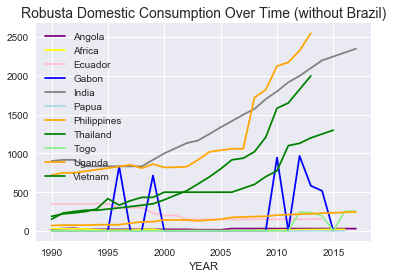

In [55]:
fig, ax1 = plt.subplots()

plotCorr = ['YEAR', 'GROWER_PRICE', 'DOMESTIC_CONSUMPTION']
#ax1 = Brazil[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='red', label='Brazil', legend='Brazil',ax=ax1)
ax1 = Angola[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='purple', label='Angola', legend='Angola', ax=ax1)
ax1 = C_Afr_Rep[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='yellow', label='Africa', legend='Africa', ax=ax1)
ax1 = Ecuador[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='pink', label='Ecuador', legend='Ecuador', ax=ax1)
ax1 = Gabon[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='blue', label='Gabon', legend='Gabon', ax=ax1)
ax1 = India[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='gray', label='India', legend='India', ax=ax1)
ax1 = Papua[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='lightblue', label='Papua', legend='Papua', ax=ax1)
ax1 = Philippines[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='orange', label='Philippines', legend='Philippines', ax=ax1)
ax1 = Thailand[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='green', label='Thailand', legend='Thailand', ax=ax1)
ax1 = Togo[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='lightgreen', label='Togo', legend='Togo', ax=ax1)
ax1 = Uganda[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='orange', label='Uganda', legend='Uganda', ax=ax1)
ax1 = Vietnam[plotCorr].plot(x='YEAR', y='DOMESTIC_CONSUMPTION', color='green', label='Vietnam', legend='Vietnam', ax=ax1)

ax1.set_title('Robusta Domestic Consumption Over Time (without Brazil)', fontsize=14, loc='center')
ax1.plot()




[]

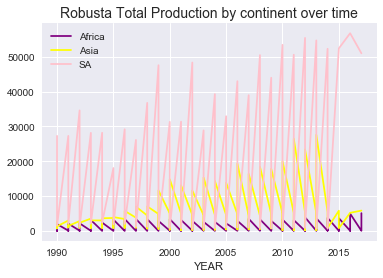

In [87]:
Africa_top = ['Uganda', 'Togo', 'C_Afr_Rep','Angola', 'Gabon', 'Cote']
Africa = priceall_20.loc[priceall['COUNTRY'].isin(Africa_top),:]

Asia_top = ['India', 'Philippines', 'Vietnam', 'Thailand']
Asia = priceall_20.loc[priceall['COUNTRY'].isin(Asia_top),:]

SA_top = ['Brazil', 'Papua', 'Ecuador']
SA = priceall_20.loc[priceall['COUNTRY'].isin(SA_top),:]

fig, ax1 = plt.subplots()

plotCorr = ['YEAR', 'TOTAL_PRODUCTION']
ax1 = Africa[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='purple', label='Africa', legend='Africa', ax=ax1)
ax1 = Asia[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='yellow', label='Asia', legend='Asia', ax=ax1)
ax1 = SA[plotCorr].plot(x='YEAR', y='TOTAL_PRODUCTION', color='pink', label='SA', legend='SA', ax=ax1)

ax1.set_title('Robusta Total Production by continent over time', fontsize=14, loc='center')
ax1.plot()



## Exportable Production vs Total Production for each country

In [58]:
import numpy as np
country_groups = priceall.groupby(['COUNTRY','YEAR'], as_index=False).agg({'GROWER_PRICE':np.mean})
country_groups
#priceall.pivot_table(index='COUNTRY', columns = 'YEAR', values='TOTAL_PRODUCTION')

#angola = priceall.loc[priceall['COUNTRY'].str.contains('Angola'),:]
#.plot(x='YEAR', y='GROWER_PRICE')

,COUNTRY,YEAR,GROWER_PRICE
0,Angola,1990,85.66
1,Angola,1991,91.12
2,Angola,1992,44.92
3,Angola,1993,11.87
4,Angola,2000,51.74
5,Angola,2001,18.61
6,Angola,2002,10.71
7,Angola,2003,6.61
8,Angola,2004,9.92
9,Angola,2005,10.42


[30.0, 21997.0, 317.0, 2350.0, 0.2539999999999978, 244.80000000000018]
[5.006, 29003.1728, 983.0, 3490.0, 54.746, 4855.2]
['Angola', 'Brazil', "Cote d'Ivoire", 'India', 'Togo', 'Uganda']


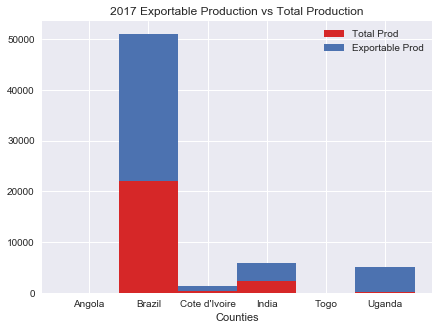

In [173]:
newdf = priceall_20.loc[priceall_20['YEAR'] == 2017 ]
newdf2 = newdf.loc[priceall_20['COUNTRY'] != 'Brazil' ]
totalProd = []
exportableProd = []
country = []

for index, row in newdf.iterrows():
   if(row['COUNTRY'] and row['TOTAL_PRODUCTION'] and row['EXPORTABLE_PRODUCTION']):
       country.append(row['COUNTRY'])
       totalProd.append(row['TOTAL_PRODUCTION']-row['EXPORTABLE_PRODUCTION'])
       exportableProd.append(row['EXPORTABLE_PRODUCTION'])

print(totalProd)
print(exportableProd)
print(country)
totalProd = tuple(totalProd)
exportableProd = tuple(exportableProd)
ind = np.arange(len(totalProd))    # the x locations for the groups
width = 1       # the width of the bars: can also be len(x) sequence

f = plt.figure(figsize=(7,5))
p1 = plt.bar(ind, totalProd, width, color='#d62728')
p2 = plt.bar(ind, exportableProd, width, bottom=totalProd)

plt.xticks(ind, tuple(country))
plt.xlabel('Counties')
plt.yticks()
plt.legend((p1[0], p2[0]), ('Total Prod', 'Exportable Prod'))
plt.title('2017 Exportable Production vs Total Production')

plt.show()